In [1]:
from datetime import date, timedelta
from scipy.stats import t
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
from src.core.repositories.stock_repository import get_repository, StockRepositoryConfig
from server.config import config as server_config
from src.core.lib.analysis.returns import returns

In [3]:
start = date.today() - timedelta(weeks=52)
end = date.today()

In [4]:
iex_config = server_config['sandbox']['iexcloud']
mysql_config = server_config['sandbox']['db']

In [12]:
repo = get_repository(iex_config=iex_config, mysql_config=mysql_config)

In [13]:
goog = repo.historical_daily('GOOG', start=start, end=end)

In [15]:
goog_closes = goog[['date','close']].copy()
goog_closes = goog_closes.set_index('date')

In [16]:
goog_closes.head()

,close
date,
2020-09-22,1523.02
2020-09-23,1426.36
2020-09-24,1436.92
2020-09-25,1502.93
2020-09-28,1525.22


<AxesSubplot:xlabel='date'>

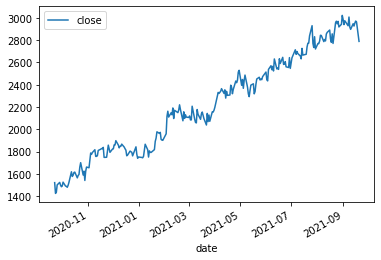

In [17]:
goog_closes.plot()

In [18]:
goog_ret = np.log(goog_closes.pct_change(1) + 1)

<AxesSubplot:xlabel='date'>

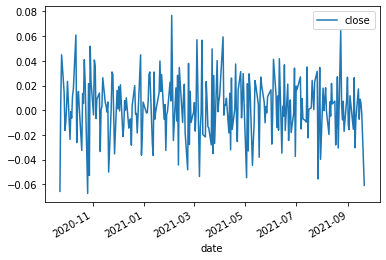

In [20]:
goog_ret.plot()

In [22]:
goog_closes['SMA-10'] = goog_closes['close'].rolling(10).mean()

In [24]:
goog_closes.head(20)

,close,SMA-10
date,,
2020-09-22,1523.02,NaN
2020-09-23,1426.36,NaN
2020-09-24,1436.92,NaN
2020-09-25,1502.93,NaN
2020-09-28,1525.22,NaN
2020-09-29,1500.57,NaN
2020-09-30,1486.30,NaN
2020-10-01,1492.21,NaN
2020-10-02,1527.49,NaN


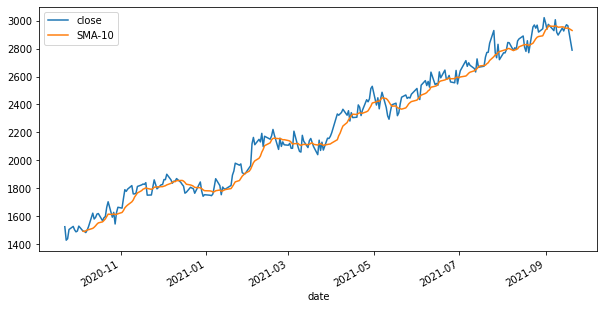

In [26]:
goog_closes.plot(figsize=(10,5));

In [27]:
goog_closes['SMA-50'] = goog_closes['close'].rolling(50).mean()

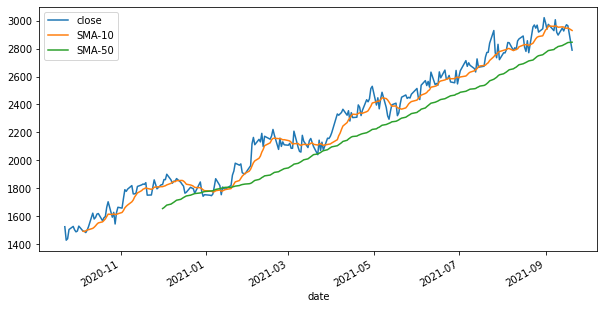

In [28]:
goog_closes.plot(figsize=(10,5));